### Install/Correct Dependencies

In [6]:
# install/correct dependencies

# UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
# warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 44.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.25.1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.25.1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.25.1 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.1 which is incompatible.
tensorflow 2.12.0 re

In [15]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 9.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622383 sha256=c92736346b04e8383cb479aa110ba7695cf573f768597e94b5287186ec0d2a12
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [17]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.5 MB/s eta 0:00:00


### Load Dependencies

In [79]:
# load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re

import nltk
nltk.download('wordnet')
import zipfile
zip_path = '/kaggle/working/nltk_data/corpora/wordnet.zip'
unzip_path = '/kaggle/working/nltk_data/corpora/'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)
    
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemer = PorterStemmer()
lemma = WordNetLemmatizer()

from autocorrect import Speller
speller = Speller()

import contractions


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load Dataset

In [80]:
# load dataset
dataset = pd.read_csv("/kaggle/input/gender-based-violence-tweet-classification/Train.csv")
dataset.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


### General Information of Dataset

In [81]:
# total records
print("Total Records of Dataset : {}".format(len(dataset)))

Total Records of Dataset : 39650


In [82]:
# types of classes
print("Different Classes in Dataset below : \n{}".format(dataset.type.value_counts()))

Different Classes in Dataset below : 
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: type, dtype: int64


### Data Preprocessing | Text Preprocessing Pipeline

Missing Data Report of each Features : 
Tweet_ID    0
tweet       0
type        0
dtype: int64


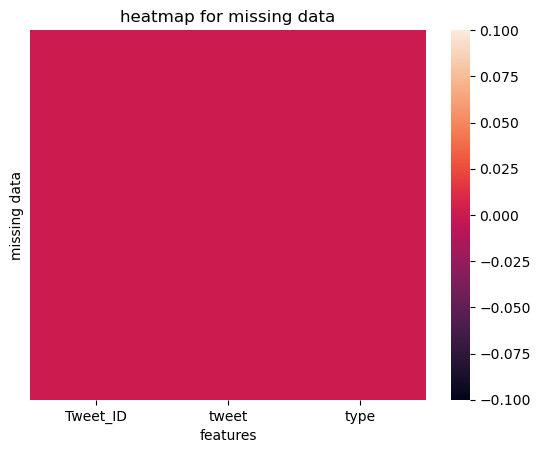

In [83]:
# missing data management
print("Missing Data Report of each Features : \n{}".format(dataset.isna().sum()))

sns.heatmap(
    dataset.isna(),
    cbar = 'viridis',
    yticklabels = False
)
plt.xlabel('features')
plt.ylabel('missing data')
plt.title('heatmap for missing data')
plt.show()
plt.close()

In [84]:
# duplicate data management
print("Duplicate Records in Dataset : \n{}".format(dataset.duplicated().sum()))


Duplicate Records in Dataset : 
0


In [85]:
# text preprocessing pipeline
def text_preprocessing(
    data, 
    lower_case = True,
    expand_form = True, 
    punc = True, 
    stopwards = True, 
    stem = False, 
    lemmat = True, 
    urls = True, 
    htmltags = True, 
    remove_num_spaces = True, 
    spell_chec = True,
):
    
    # change to lowercase
    if(lower_case):
        data = data.lower()
    
    # contraction to expanded form
    if(expand_form):
        data = contractions.fix(data)
        
    # remove html tags
    if(htmltags):
        html_pattern = re.compile("<.*?>")
        data = html_pattern.sub(r'', data)
    
    # remove urls
    if(urls):
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        data = url_pattern.sub(r'', data)
    
    # remove stopwords
    if(stopwards):
        data = ' '.join([word for word in word_tokenize(data) if not word in list(stopwords.words('english'))])
    
    # spelling checker
    if(spell_chec):
        data = speller(data)
    
    # stemming
    if(stem):
        data = ' '.join([stemer.stem(word) for word in word_tokenize(data)])
    
    # lemmatization
    if(lemmat):
        data = ' '.join([lemma.lemmatize(word) for word in word_tokenize(data)])
        
    # remove punctuations
    if(punc):
        data = data.translate(str.maketrans('', '', string.punctuation))
    
    # remove numbers and extra spaces
    if(remove_num_spaces):
        pattern = r"\d+"
        data = re.sub(pattern, "", str(data))
        data.replace('\s+', ' ')

    return data

In [86]:
dataset['tweet_preprocessed'] = dataset['tweet'].apply(func = lambda x:text_preprocessing(x))
dataset.head()

,Tweet_ID,tweet,type,tweet_preprocessed
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence,dream got raped last night guy work actually...
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence,thought word raped mean sex told “ saw dog rap...
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,talking raped men forested jail other charge...
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence,sexually abused year age one believed rape...
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence,chess proud better telling truth selling owen...


In [87]:
dataset.to_csv("preproceses_train.csv")

In [89]:
# categorical data management
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['label_encode'] = label_encoder.fit_transform(dataset['type'])



In [90]:
dataset.head()

,Tweet_ID,tweet,type,tweet_preprocessed,label_encode
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence,dream got raped last night guy work actually...,4
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence,thought word raped mean sex told “ saw dog rap...,4
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence,talking raped men forested jail other charge...,4
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence,sexually abused year age one believed rape...,4
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence,chess proud better telling truth selling owen...,4


In [91]:
# BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['tweet_preprocessed'])
y = dataset['label_encode']

In [92]:
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [94]:
# linear svc with bow
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

classifier = LinearSVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9987389659520807

In [95]:
# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['tweet_preprocessed'])
y = dataset['label_encode']

In [96]:
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [98]:
# decision tree with tfidf
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9977301387137453

In [99]:
# random forest with tfidf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9978562421185372

In [116]:
# MLP
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Tokenize and pad the text
max_words = 1000
maxlen = 20

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(dataset['tweet_preprocessed'])
sequences = tokenizer.texts_to_sequences(dataset['tweet_preprocessed'])
X = pad_sequences(sequences, maxlen=maxlen)
y = dataset['label_encode']
y = to_categorical(y)


In [117]:
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [128]:
# Tokenize and pad the text
max_words = 1000
maxlen = 20

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(dataset['tweet_preprocessed'])
sequences = tokenizer.texts_to_sequences(dataset['tweet_preprocessed'])
X = pad_sequences(sequences, maxlen=maxlen)

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['label_encode'])
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [131]:
# Build the model
model = Sequential()
model.add(Embedding(max_words, 50, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 3 classes for the 3 unique labels

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}, Testing Loss: {test_loss:.4f}")

Epoch 1/10
893/893 [==============================] - 4s 3ms/step - loss: 0.1335 - accuracy: 0.9660 - val_loss: 0.0234 - val_accuracy: 0.9921
Epoch 2/10
893/893 [==============================] - 3s 3ms/step - loss: 0.0125 - accuracy: 0.9970 - val_loss: 0.0136 - val_accuracy: 0.9953
Epoch 3/10
893/893 [==============================] - 2s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0116 - val_accuracy: 0.9953
Epoch 4/10
893/893 [==============================] - 3s 3ms/step - loss: 8.4278e-04 - accuracy: 0.9999 - val_loss: 0.0085 - val_accuracy: 0.9959
Epoch 5/10
893/893 [==============================] - 3s 3ms/step - loss: 9.2505e-04 - accuracy: 0.9997 - val_loss: 0.0121 - val_accuracy: 0.9956
Epoch 6/10
893/893 [==============================] - 3s 3ms/step - loss: 6.7138e-04 - accuracy: 0.9998 - val_loss: 0.0116 - val_accuracy: 0.9962
Epoch 7/10
893/893 [==============================] - 3s 3ms/step - loss: 4.8219e-04 - accuracy: 0.9998 - val_loss: 0.0149 - val_accurac